In [42]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
plt.rcParams['figure.figsize'] = (10,5)
plt.rcParams['figure.dpi'] = 200
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('wine.csv')

In [10]:
df

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


# Exploratory Data Analysis (EDA):

In [11]:
df.describe()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Type             178 non-null    int64  
 1   Alcohol          178 non-null    float64
 2   Malic            178 non-null    float64
 3   Ash              178 non-null    float64
 4   Alcalinity       178 non-null    float64
 5   Magnesium        178 non-null    int64  
 6   Phenols          178 non-null    float64
 7   Flavanoids       178 non-null    float64
 8   Nonflavanoids    178 non-null    float64
 9   Proanthocyanins  178 non-null    float64
 10  Color            178 non-null    float64
 11  Hue              178 non-null    float64
 12  Dilution         178 non-null    float64
 13  Proline          178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


In [16]:
df.isna().sum()

Type               0
Alcohol            0
Malic              0
Ash                0
Alcalinity         0
Magnesium          0
Phenols            0
Flavanoids         0
Nonflavanoids      0
Proanthocyanins    0
Color              0
Hue                0
Dilution           0
Proline            0
dtype: int64

array([[<Axes: title={'center': 'Type'}>,
        <Axes: title={'center': 'Alcohol'}>,
        <Axes: title={'center': 'Malic'}>,
        <Axes: title={'center': 'Ash'}>],
       [<Axes: title={'center': 'Alcalinity'}>,
        <Axes: title={'center': 'Magnesium'}>,
        <Axes: title={'center': 'Phenols'}>,
        <Axes: title={'center': 'Flavanoids'}>],
       [<Axes: title={'center': 'Nonflavanoids'}>,
        <Axes: title={'center': 'Proanthocyanins'}>,
        <Axes: title={'center': 'Color'}>,
        <Axes: title={'center': 'Hue'}>],
       [<Axes: title={'center': 'Dilution'}>,
        <Axes: title={'center': 'Proline'}>, <Axes: >, <Axes: >]],
      dtype=object)

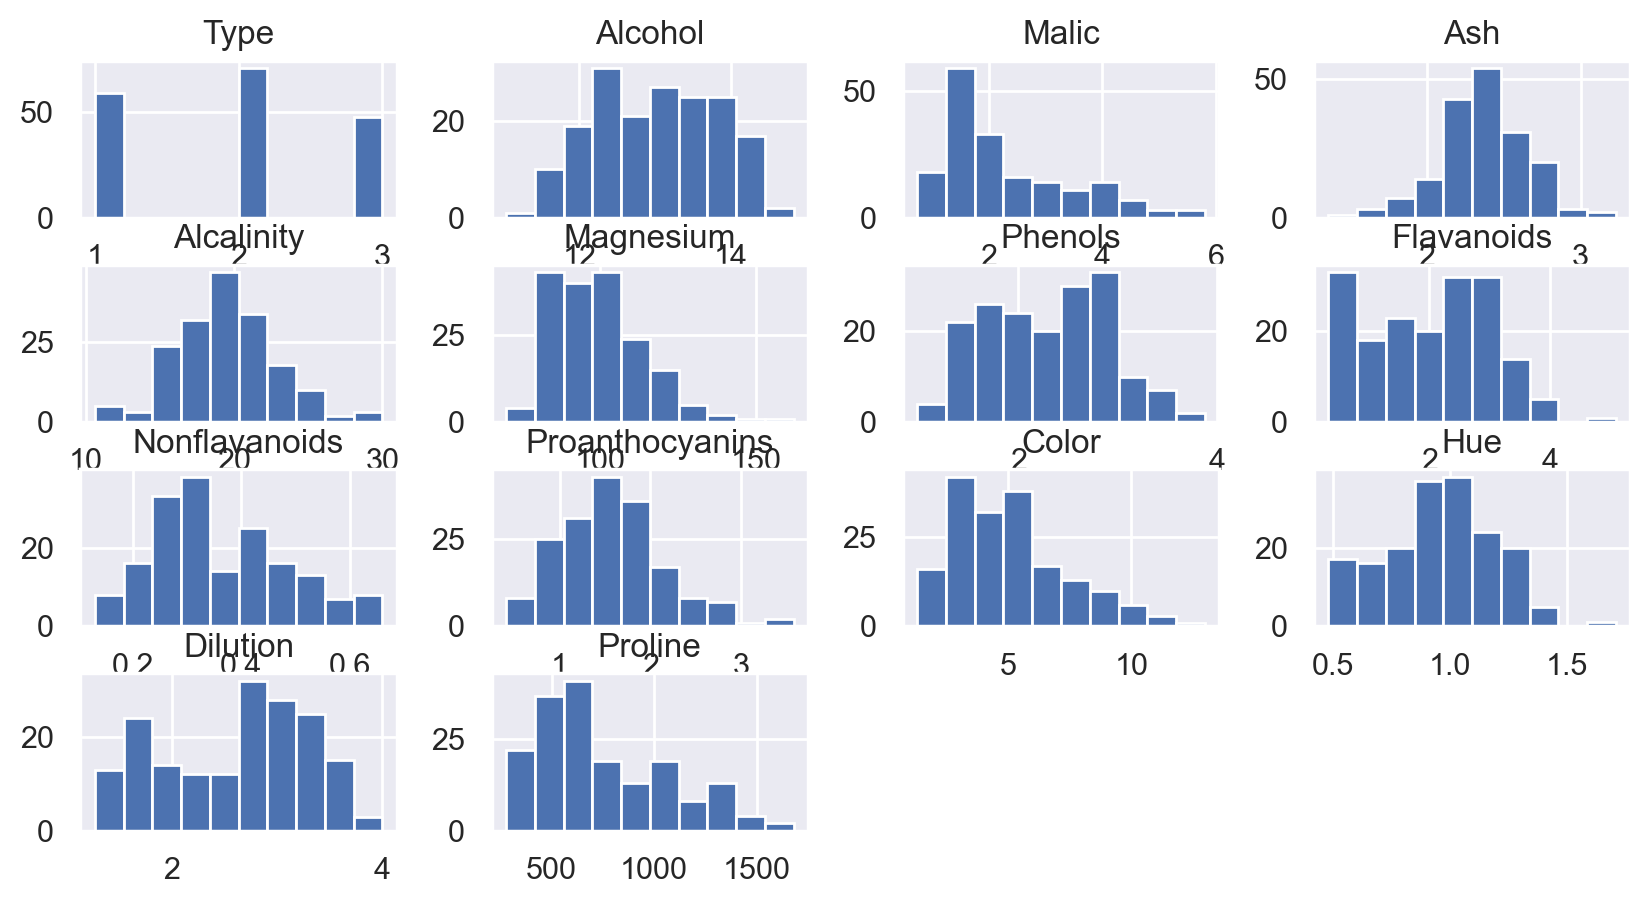

In [28]:
df.hist()

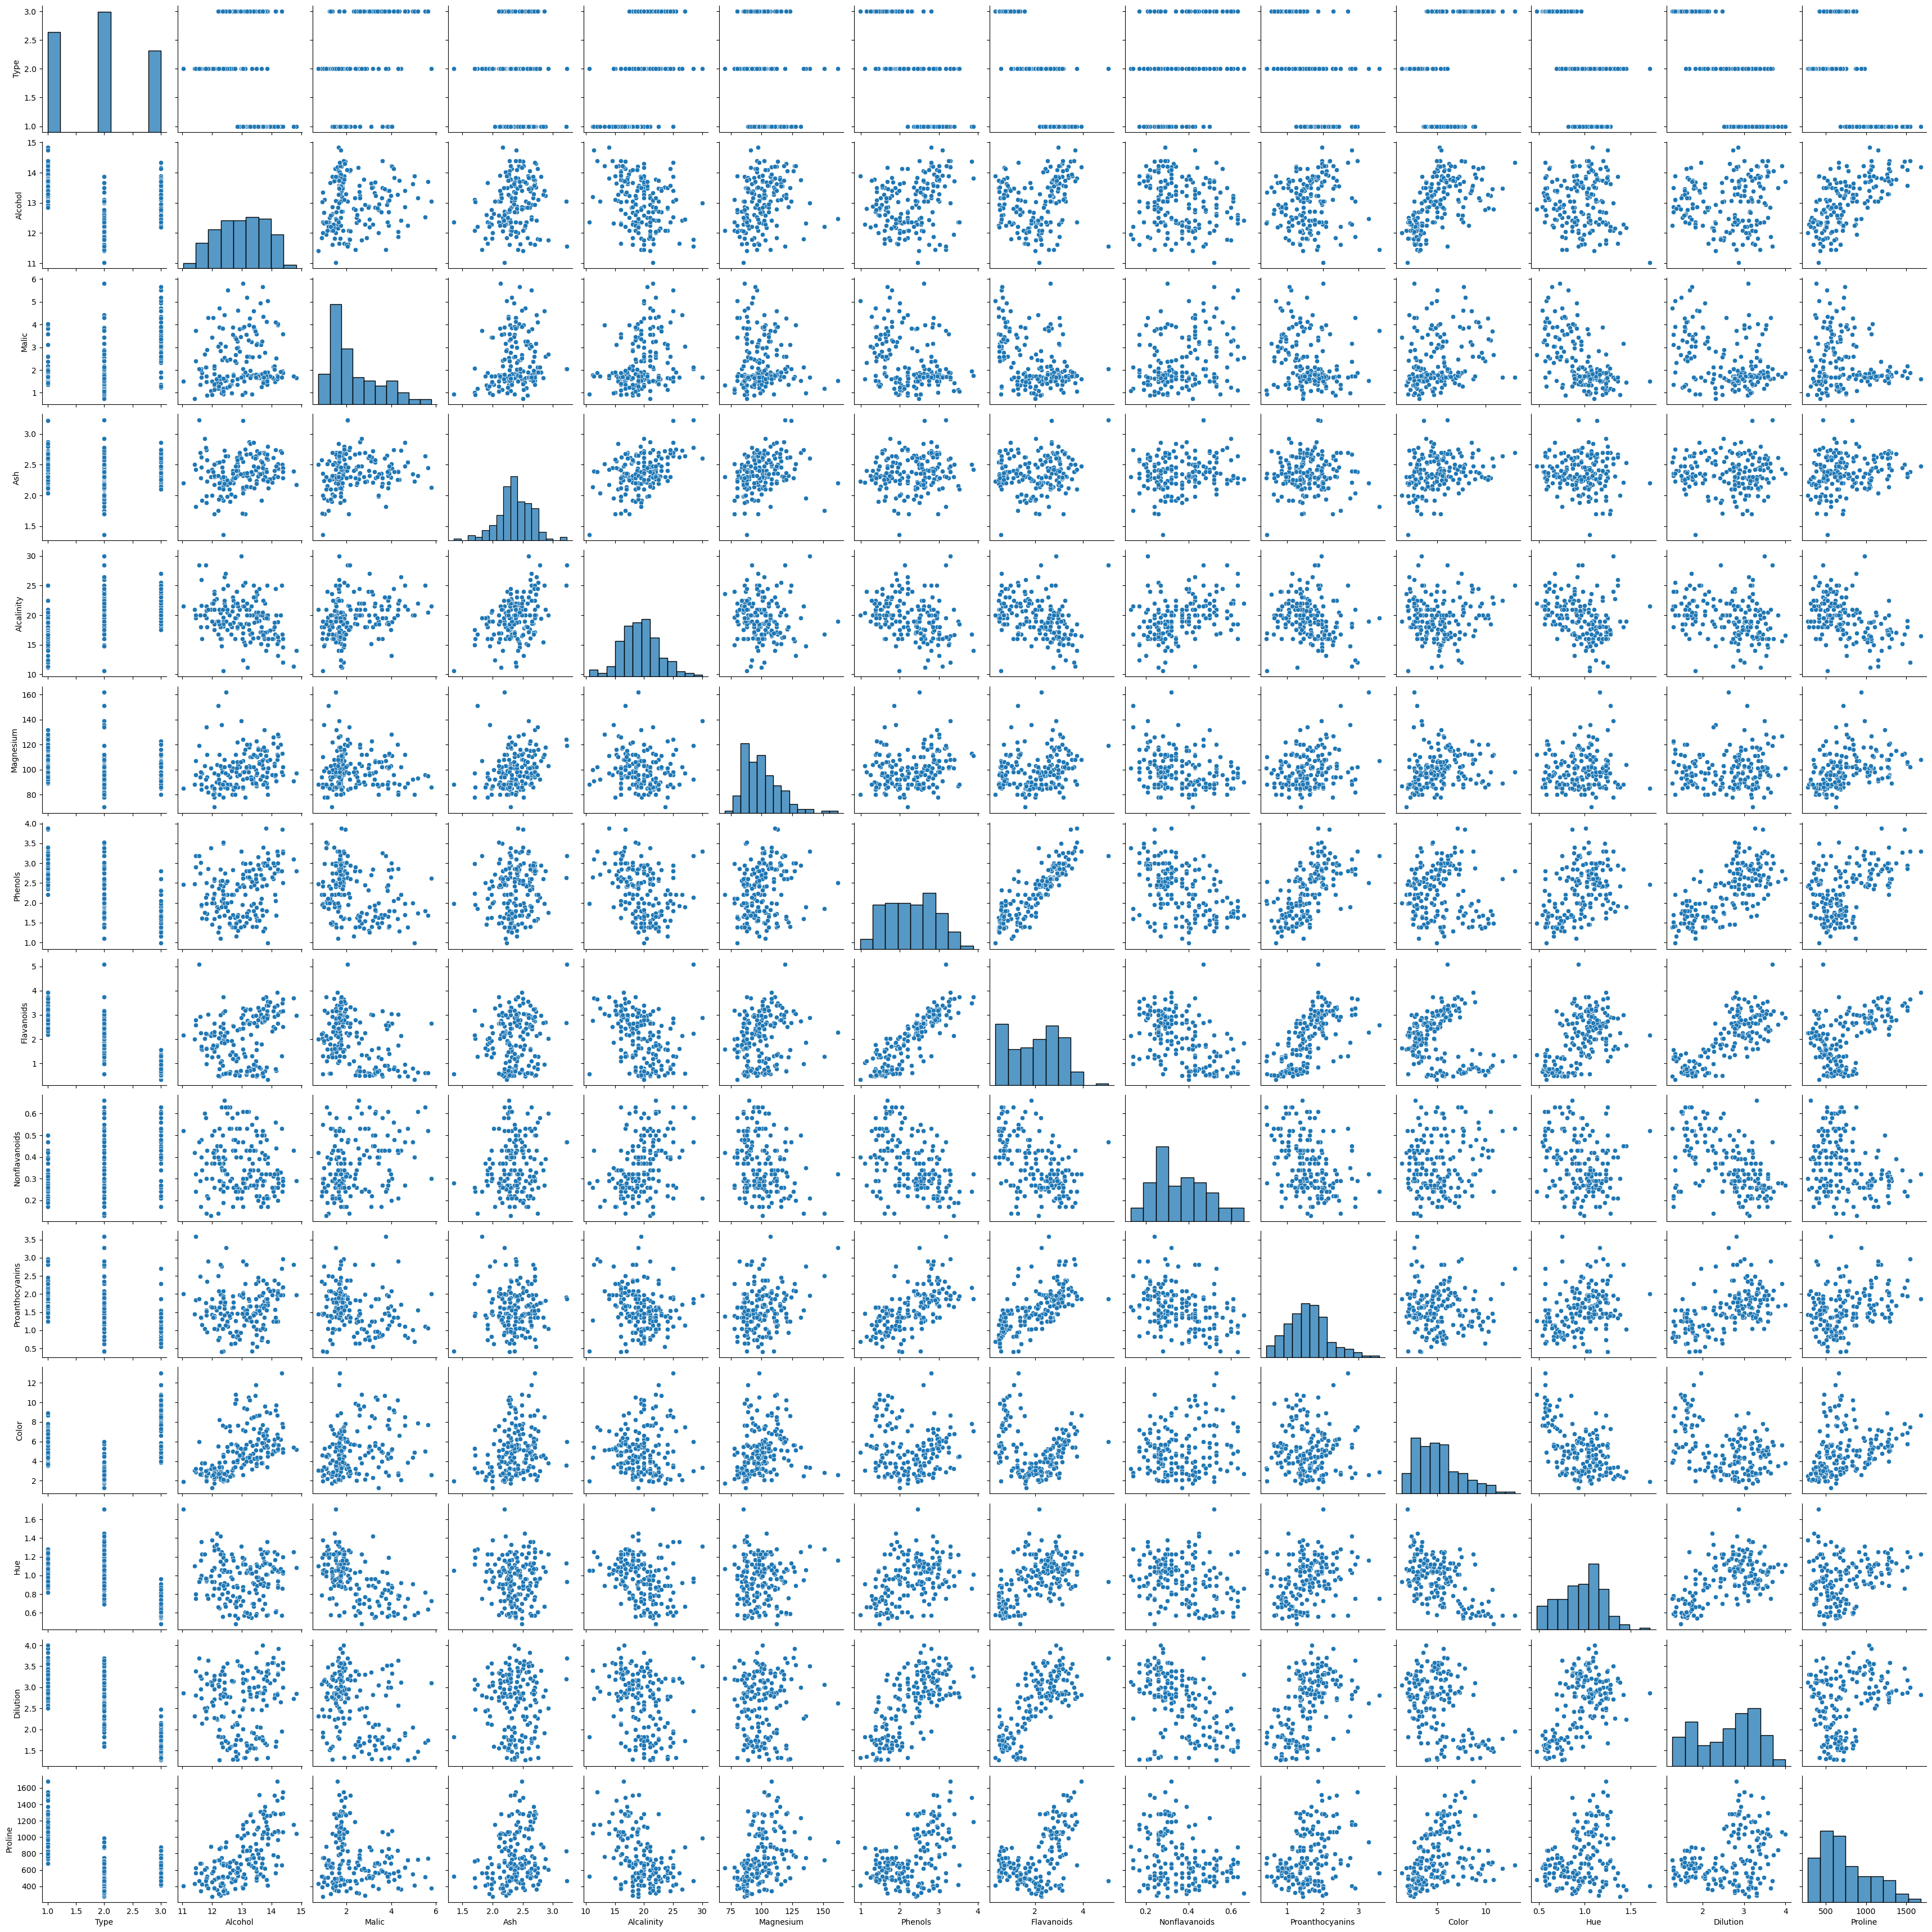

In [20]:
sns.pairplot(df)

In [29]:
df.head()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [32]:
df.corr()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
Type,1.000000,-0.328222,0.437776,-0.049643,0.517859,-0.209179,-0.719163,-0.847498,0.489109,-0.499130,0.265668,-0.617369,-0.788230,-0.633717
Alcohol,-0.328222,1.000000,0.094397,0.211545,-0.310235,0.270798,0.289101,0.236815,-0.155929,0.136698,0.546364,-0.071747,0.072343,0.643720
Malic,0.437776,0.094397,1.000000,0.164045,0.288500,-0.054575,-0.335167,-0.411007,0.292977,-0.220746,0.248985,-0.561296,-0.368710,-0.192011
Ash,-0.049643,0.211545,0.164045,1.000000,0.443367,0.286587,0.128980,0.115077,0.186230,0.009652,0.258887,-0.074667,0.003911,0.223626
Alcalinity,0.517859,-0.310235,0.288500,0.443367,1.000000,-0.083333,-0.321113,-0.351370,0.361922,-0.197327,0.018732,-0.273955,-0.276769,-0.440597
Magnesium,-0.209179,0.270798,-0.054575,0.286587,-0.083333,1.000000,0.214401,0.195784,-0.256294,0.236441,0.199950,0.055398,0.066004,0.393351
Phenols,-0.719163,0.289101,-0.335167,0.128980,-0.321113,0.214401,1.000000,0.864564,-0.449935,0.612413,-0.055136,0.433681,0.699949,0.498115
Flavanoids,-0.847498,0.236815,-0.411007,0.115077,-0.351370,0.195784,0.864564,1.000000,-0.537900,0.652692,-0.172379,0.543479,0.787194,0.494193
Nonflavanoids,0.489109,-0.155929,0.292977,0.186230,0.361922,-0.256294,-0.449935,-0.537900,1.000000,-0.365845,0.139057,-0.262640,-0.503270,-0.311385
Proanthocyanins,-0.499130,0.136698,-0.220746,0.009652,-0.197327,0.236441,0.612413,0.652692,-0.365845,1.000000,-0.025250,0.295544,0.519067,0.330417


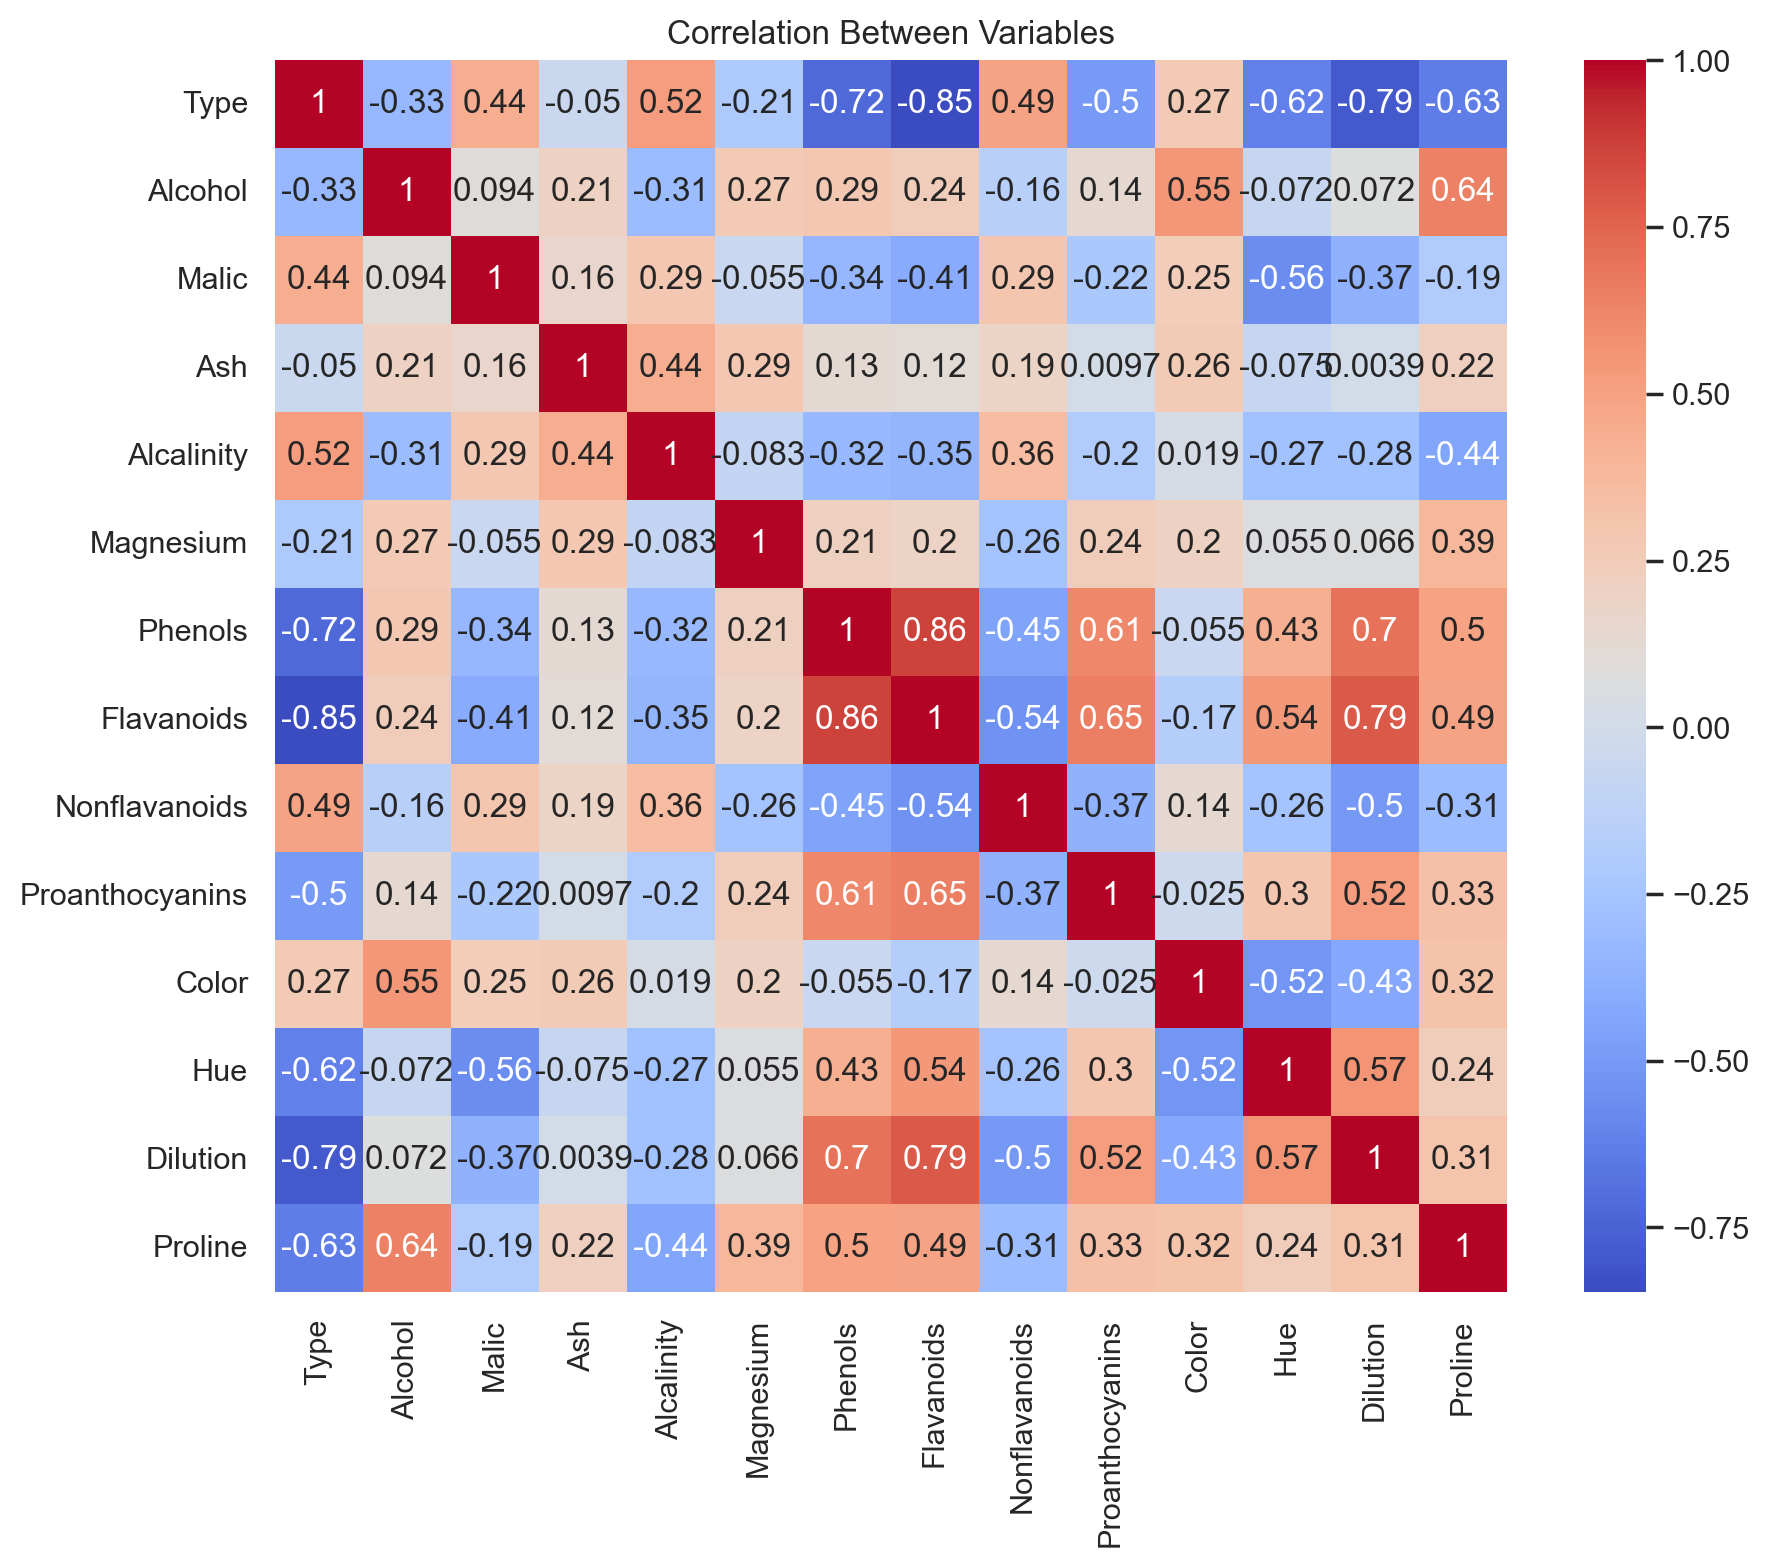

In [33]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', square=True)
plt.title('Correlation Between Variables')
plt.show()

In [4]:
Type = df["Type"]
df.drop(columns="Type",inplace=True)

In [6]:
Type

0      1
1      1
2      1
3      1
4      1
      ..
173    3
174    3
175    3
176    3
177    3
Name: Type, Length: 178, dtype: int64

# Dimensionality Reduction with PCA:

In [9]:
sc = StandardScaler()
x = sc.fit_transform(df)
x

array([[ 1.51861254, -0.5622498 ,  0.23205254, ...,  0.36217728,
         1.84791957,  1.01300893],
       [ 0.24628963, -0.49941338, -0.82799632, ...,  0.40605066,
         1.1134493 ,  0.96524152],
       [ 0.19687903,  0.02123125,  1.10933436, ...,  0.31830389,
         0.78858745,  1.39514818],
       ...,
       [ 0.33275817,  1.74474449, -0.38935541, ..., -1.61212515,
        -1.48544548,  0.28057537],
       [ 0.20923168,  0.22769377,  0.01273209, ..., -1.56825176,
        -1.40069891,  0.29649784],
       [ 1.39508604,  1.58316512,  1.36520822, ..., -1.52437837,
        -1.42894777, -0.59516041]])

In [12]:
pca = PCA()
pcs = pca.fit_transform(x)
pd.DataFrame(pcs)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,3.316751,-1.443463,-0.165739,-0.215631,0.693043,-0.223880,0.596427,0.065139,0.641443,1.020956,-0.451563,0.540810,-0.066239
1,2.209465,0.333393,-2.026457,-0.291358,-0.257655,-0.927120,0.053776,1.024416,-0.308847,0.159701,-0.142657,0.388238,0.003637
2,2.516740,-1.031151,0.982819,0.724902,-0.251033,0.549276,0.424205,-0.344216,-1.177834,0.113361,-0.286673,0.000584,0.021717
3,3.757066,-2.756372,-0.176192,0.567983,-0.311842,0.114431,-0.383337,0.643593,0.052544,0.239413,0.759584,-0.242020,-0.369484
4,1.008908,-0.869831,2.026688,-0.409766,0.298458,-0.406520,0.444074,0.416700,0.326819,-0.078366,-0.525945,-0.216664,-0.079364
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,-3.370524,-2.216289,-0.342570,1.058527,-0.574164,-1.108788,0.958416,-0.146097,-0.022498,-0.304117,0.139228,0.170786,-0.114427
174,-2.601956,-1.757229,0.207581,0.349496,0.255063,-0.026465,0.146894,-0.552427,-0.097969,-0.206061,0.258198,-0.279431,-0.187371
175,-2.677839,-2.760899,-0.940942,0.312035,1.271355,0.273068,0.679235,0.047024,0.001222,-0.247997,0.512492,0.698766,0.072078
176,-2.387017,-2.297347,-0.550696,-0.688285,0.813955,1.178783,0.633975,0.390829,0.057448,0.491490,0.299822,0.339821,-0.021866


In [13]:
np.cumsum(pca.explained_variance_ratio_)

array([0.36198848, 0.55406338, 0.66529969, 0.73598999, 0.80162293,
       0.85098116, 0.89336795, 0.92017544, 0.94239698, 0.96169717,
       0.97906553, 0.99204785, 1.        ])

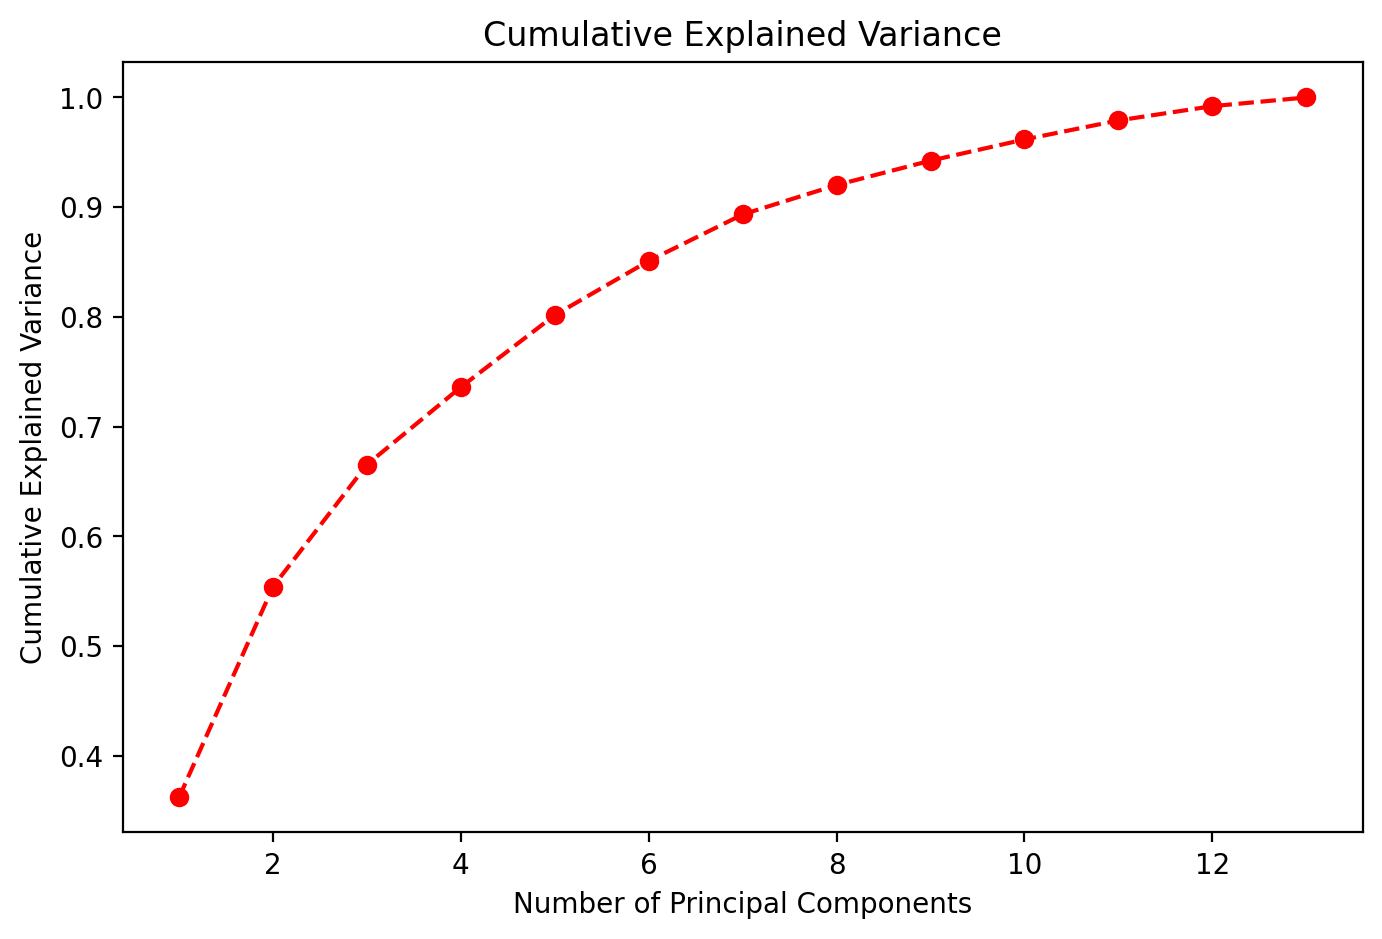

In [19]:
# Scree plot to determine the optimal number of components
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(explained_variance_ratio) + 1), np.cumsum(explained_variance_ratio), marker='o', linestyle='--', color="red")
plt.title('Cumulative Explained Variance')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.show()

In [70]:
optimal_components = 5  # Adjust based on analysis
pca = PCA(n_components=optimal_components)

# Fit and transform
X_reduced = pca.fit_transform(x)

# Optional: create a DataFrame for easier interpretation
columns = [f'PC{i+1}' for i in range(optimal_components)]
X_reduced_df = pd.DataFrame(X_reduced, columns=columns)

print(X_reduced_df.head(10))

        PC1       PC2       PC3       PC4       PC5
0  3.316751 -1.443463 -0.165739 -0.215631  0.693043
1  2.209465  0.333393 -2.026457 -0.291358 -0.257655
2  2.516740 -1.031151  0.982819  0.724902 -0.251033
3  3.757066 -2.756372 -0.176192  0.567983 -0.311842
4  1.008908 -0.869831  2.026688 -0.409766  0.298458
5  3.050254 -2.122401 -0.629396 -0.515637 -0.632019
6  2.449090 -1.174850 -0.977095 -0.065831 -1.027762
7  2.059437 -1.608963  0.146282 -1.192608  0.076903
8  2.510874 -0.918071 -1.770969  0.056270 -0.892257
9  2.753628 -0.789438 -0.984247  0.349382 -0.468553


# Clustering with Original Data:

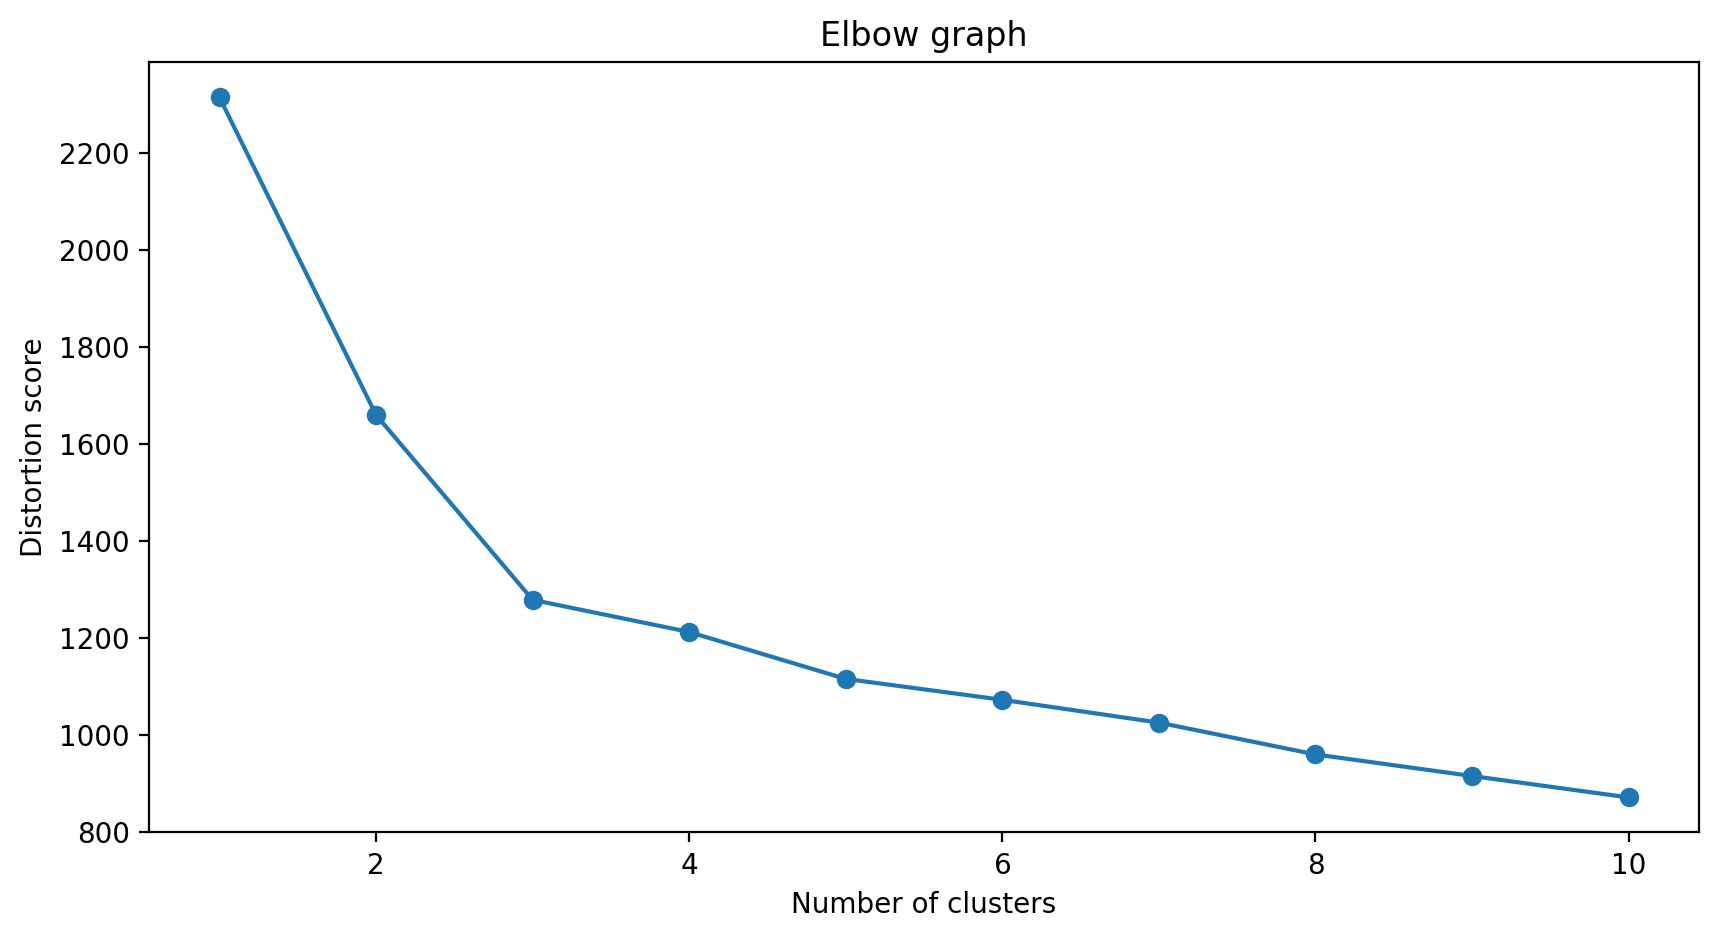

In [85]:
distortions = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(x)
    distortions.append(kmeans.inertia_)

# Plot the elbow graph
plt.plot(range(1, 11), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion score')
plt.title('Elbow graph')
plt.show()


Text(0, 0.5, 'Feature 2 (Standardized)')

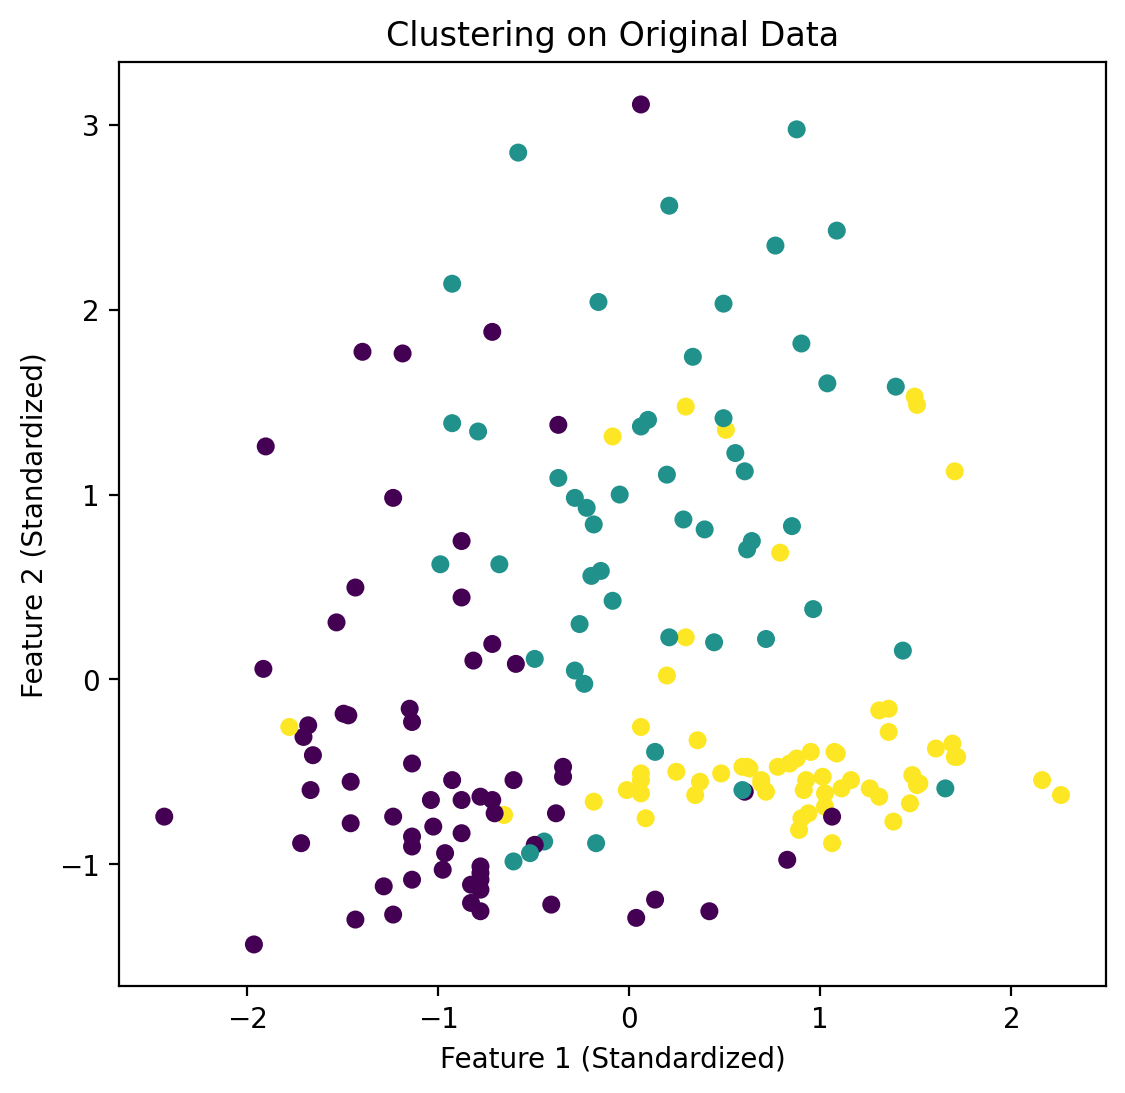

In [87]:
kmeans_original = KMeans(n_clusters=3, random_state=42).fit(x)
labels_original = kmeans_original.labels_

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.scatter(x[:, 0], x[:, 1], c=labels_original, cmap='viridis', s=30)
plt.title('Clustering on Original Data')
plt.xlabel('Feature 1 (Standardized)')
plt.ylabel('Feature 2 (Standardized)')

In [104]:
from sklearn.metrics import silhouette_score
def calculate_silhouette_score(x,cluster_labels):
    silhouette = silhouette_score(x, cluster_labels)
    return silhouette
bsilhouette = calculate_silhouette_score(x,bypred)
print("Silhouette Score:", bsilhouette)

Silhouette Score: 0.28594199657074876


# Clustering with PCA Data:

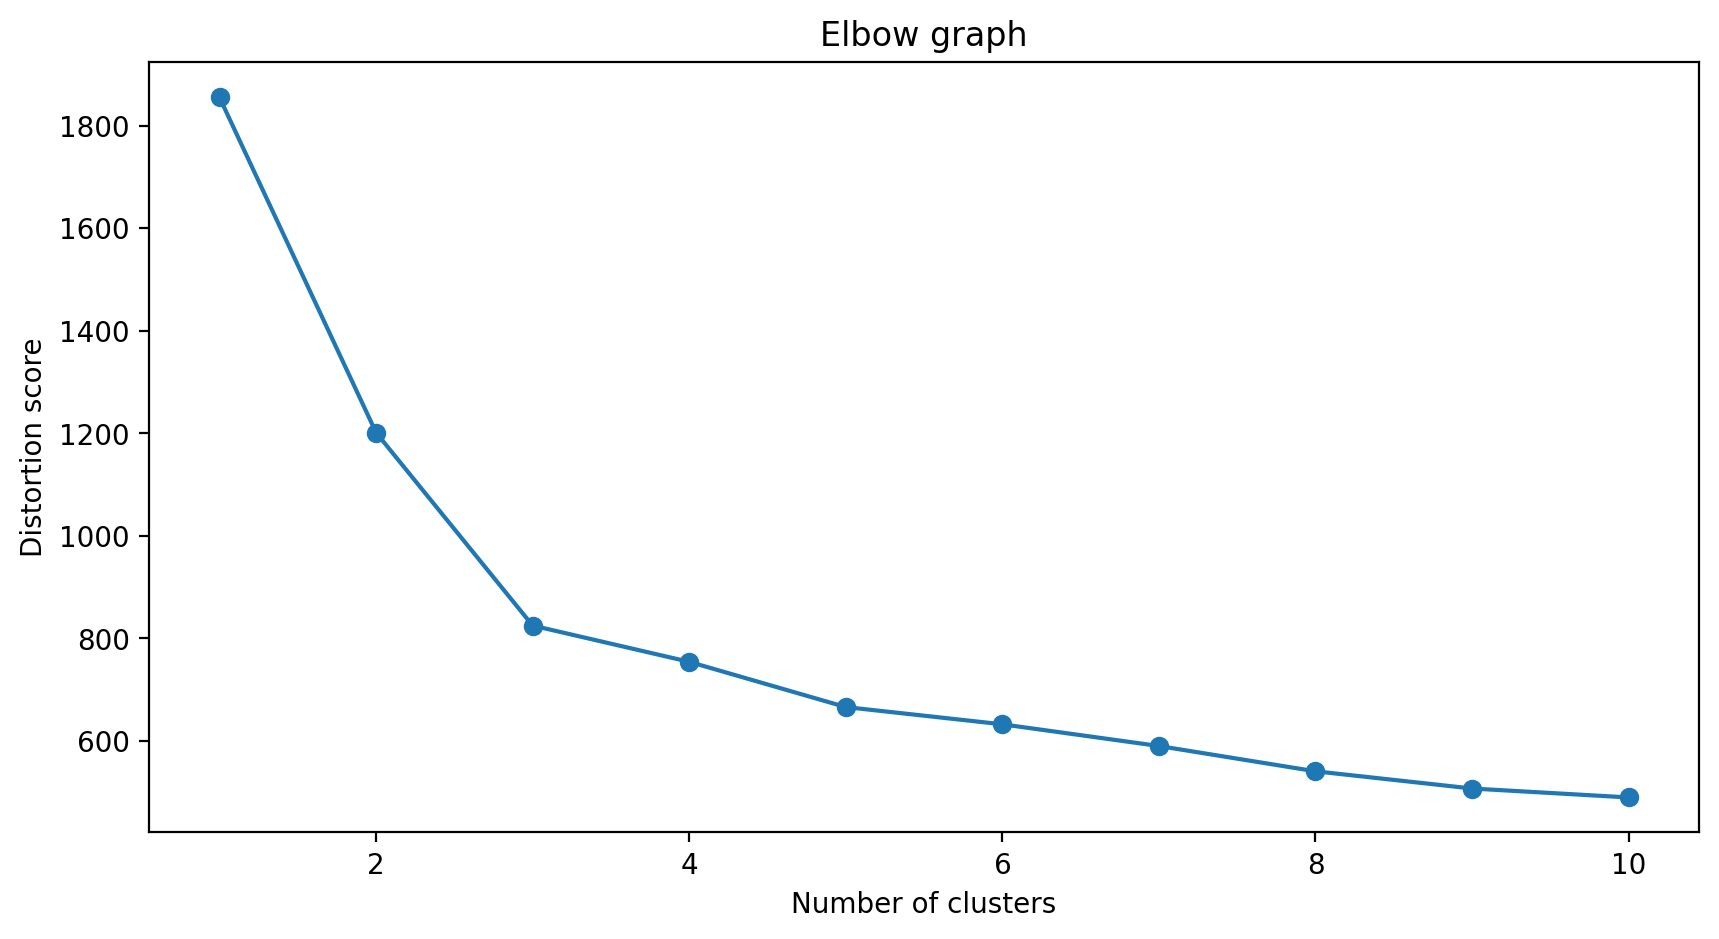

In [88]:
distortions = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X_reduced_df)
    distortions.append(kmeans.inertia_)

# Plot the elbow graph
plt.plot(range(1, 11), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion score')
plt.title('Elbow graph')
plt.show()


In [90]:
scaler = StandardScaler()
X_standardized = scaler.fit_transform(X_reduced_df)  # X is the dataset excluding the labels

# Apply K-Means with an initial guess for k (e.g., k=3)
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_standardized)

# Add cluster labels to the dataset
#df['Cluster'] = kmeans.labels_

KMeans(n_clusters=3, random_state=42)

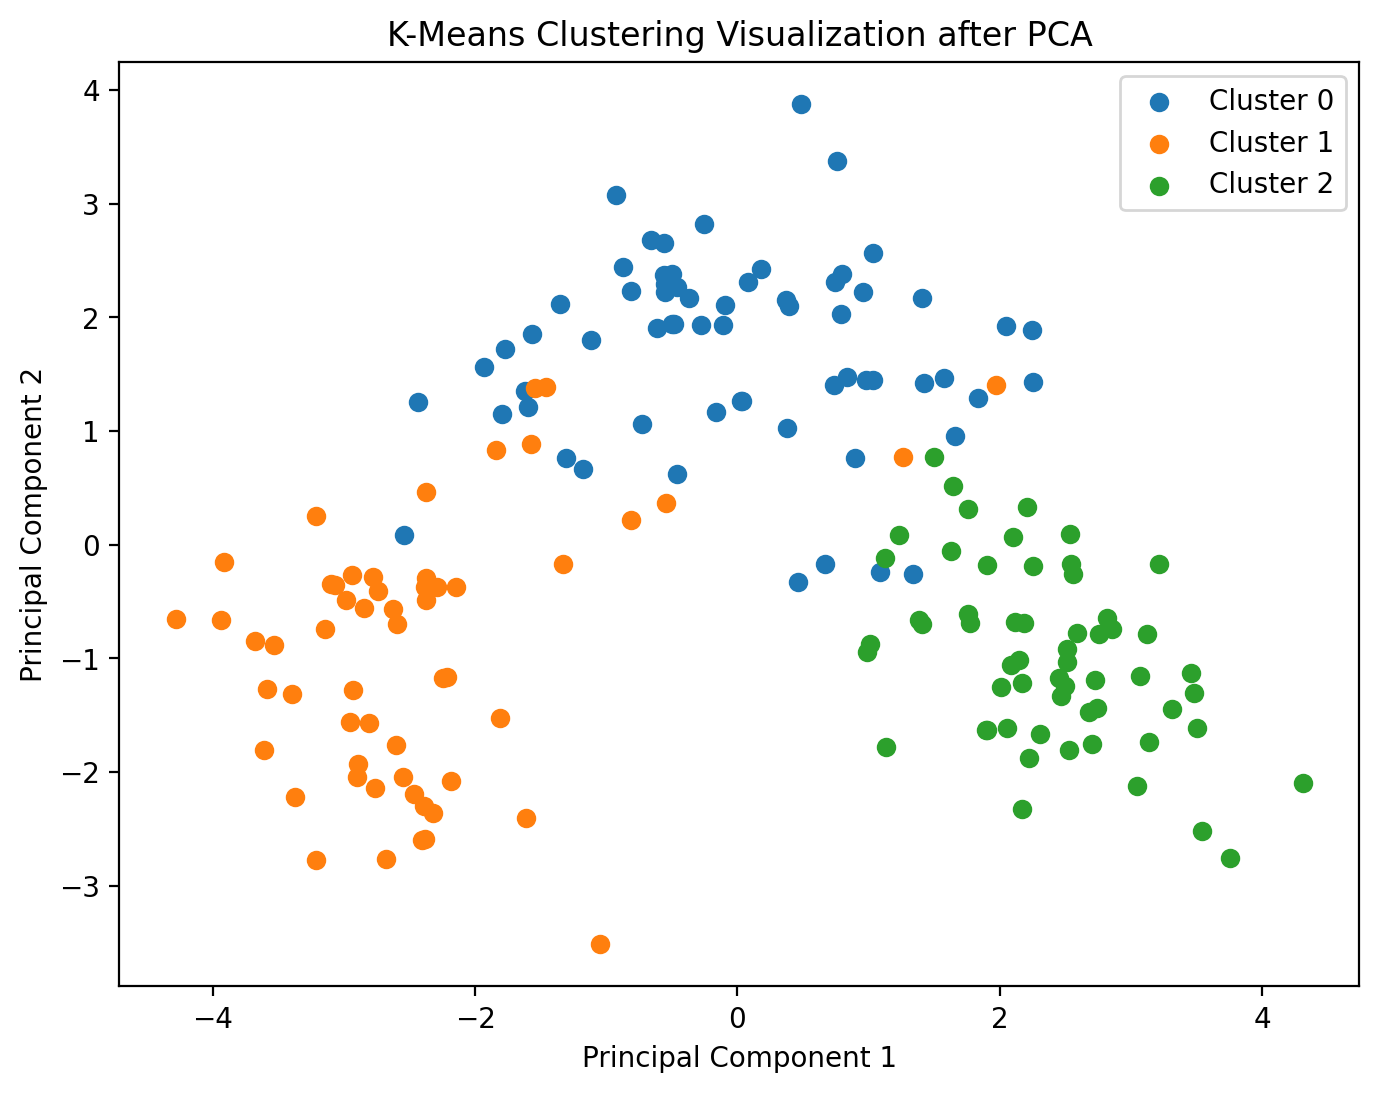

In [91]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_reduced_df)

# Create a scatter plot of clusters
plt.figure(figsize=(8, 6))
for cluster in set(kmeans.labels_):
    cluster_points = X_pca[kmeans.labels_ == cluster]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f'Cluster {cluster}')

plt.title('K-Means Clustering Visualization after PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()

# : Comparison and Analysis:

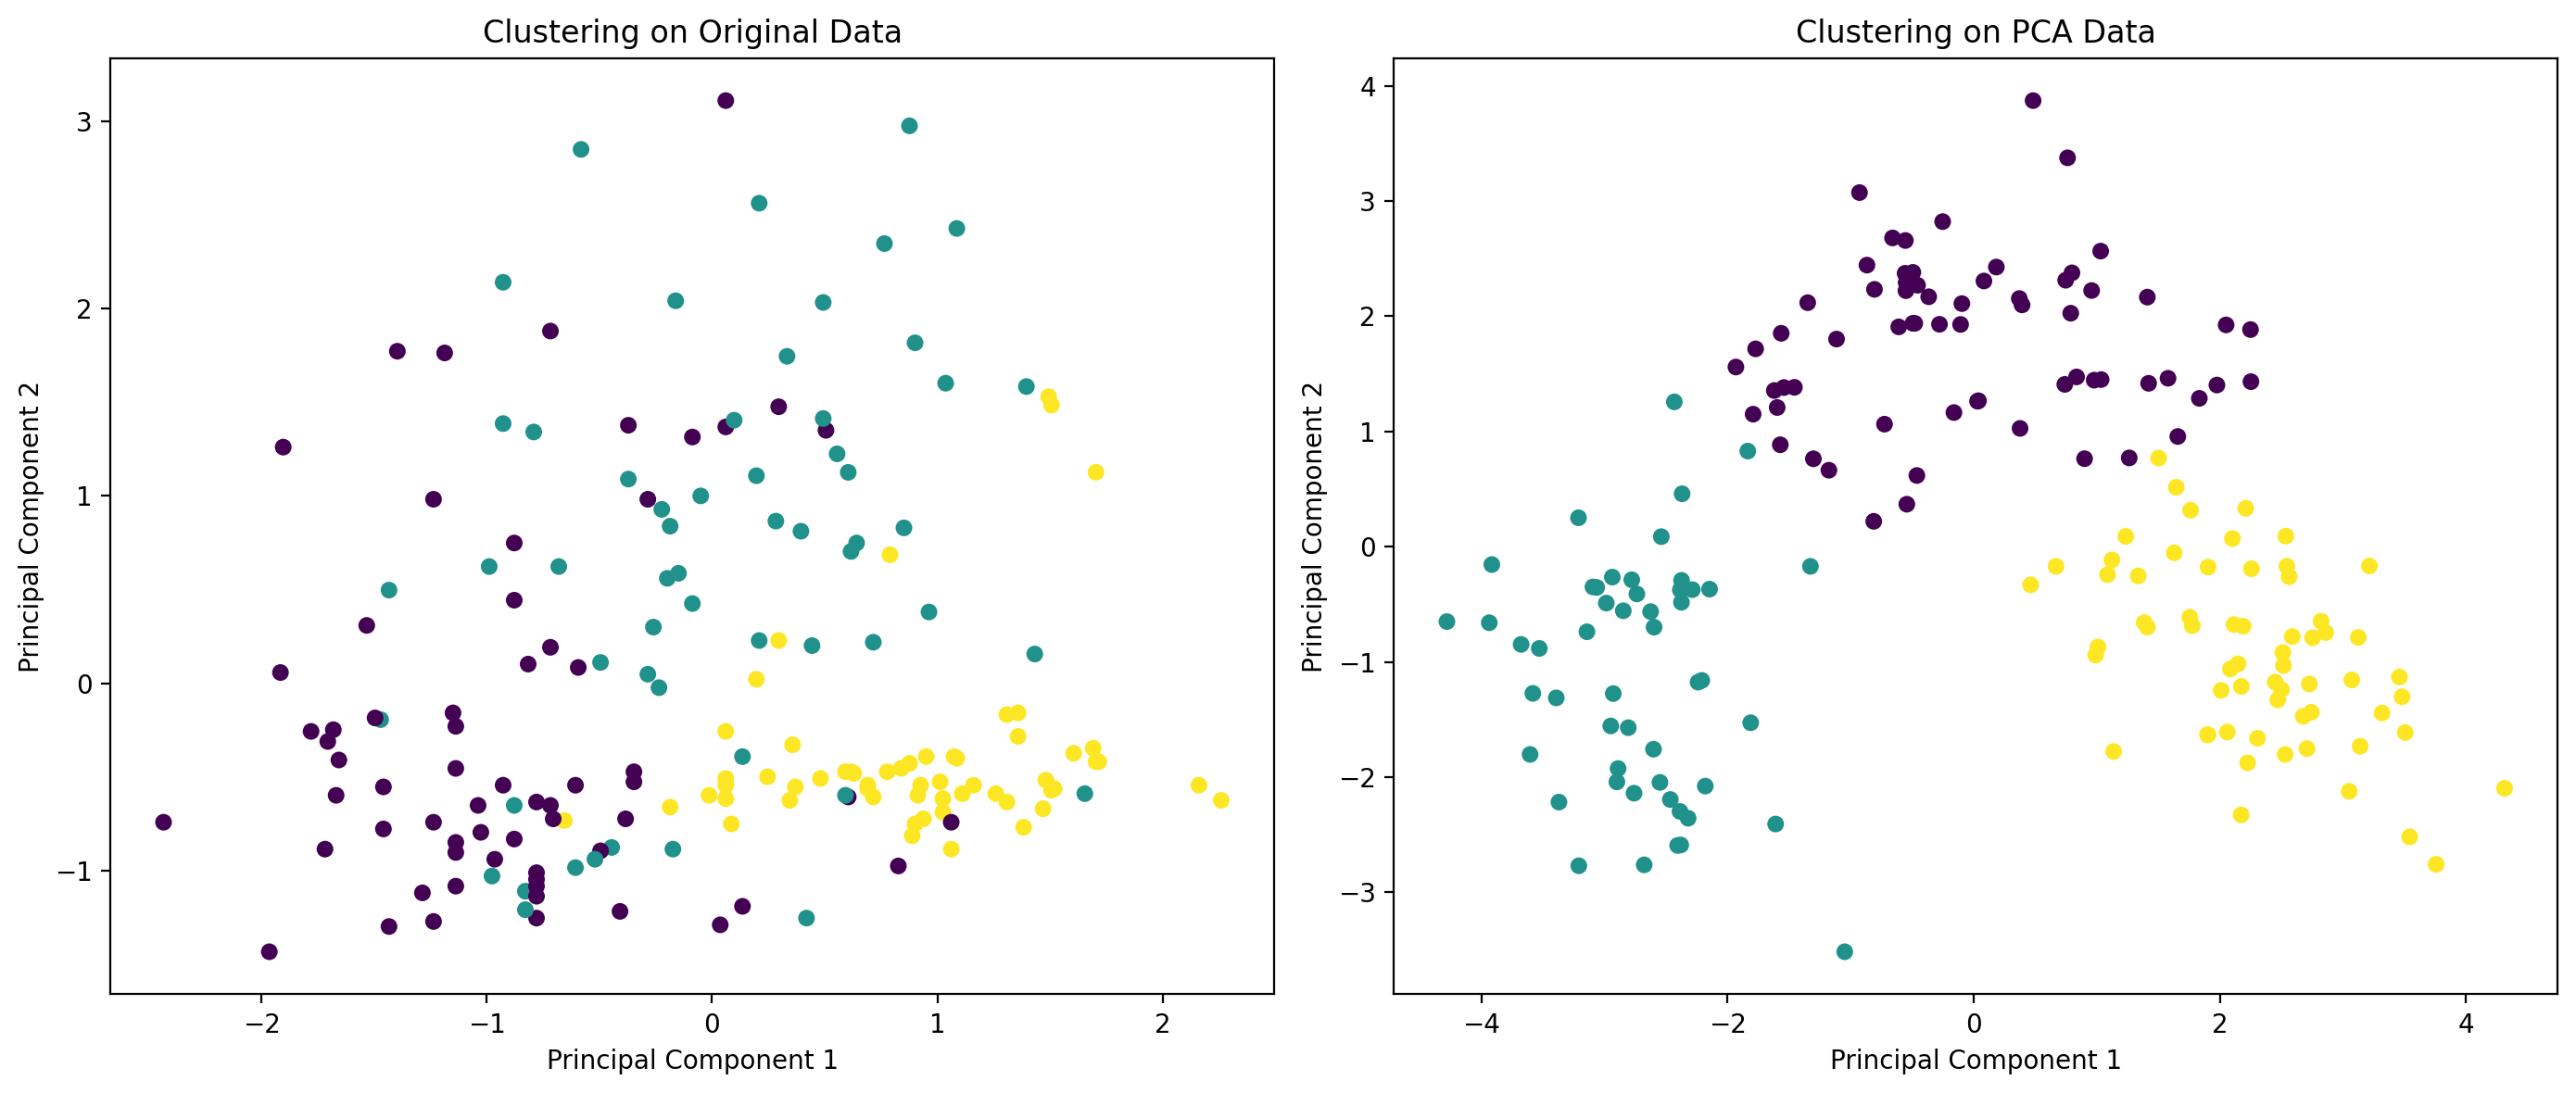

In [77]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Original Data Clustering Visualization
axes[0].scatter(x[:, 0], x[:, 1], c=kmeans.labels_, cmap='viridis', s=30)
axes[0].set_title('Clustering on Original Data')
axes[0].set_xlabel('Principal Component 1')
axes[0].set_ylabel('Principal Component 2')

# PCA Data Clustering Visualization
axes[1].scatter(X_reduced[:, 0], X_reduced[:, 1], c=kmeans_pca.labels_, cmap='viridis', s=30)
axes[1].set_title('Clustering on PCA Data')
axes[1].set_xlabel('Principal Component 1')
axes[1].set_ylabel('Principal Component 2')

plt.tight_layout()
plt.show()

In [118]:
silhouette_avg1 = silhouette_score(x, labels)
print(f"Silhouette Score before PCA: {silhouette_avg1:.3f}")

silhouette_avg2 = silhouette_score(X_reduced, labels)
print(f"Silhouette Score after PCA: {silhouette_avg2:.3f}")

# Davies–Bouldin Index
db_index1 = davies_bouldin_score(x, labels)
print(f"Davies–Bouldin Index before PCA: {db_index1:.3f}")

db_index2 = davies_bouldin_score(X_reduced, labels)
print(f"Davies–Bouldin Index after PCA: {db_index2:.3f}")

Silhouette Score before PCA: 0.286
Silhouette Score after PCA: 0.370
Davies–Bouldin Index before PCA: 1.392
Davies–Bouldin Index after PCA: 1.096


# Conclusion and Insights

In [119]:
print("Performance Metrics Comparison:")
print(f"Original Data - Silhouette Score: {silhouette_avg1:.3f}, Davies-Bouldin Index: {db_index1:.3f}")
print(f"PCA Data - Silhouette Score: {silhouette_avg2:.3f}, Davies-Bouldin Index: {db_index2:.3f}")

print("\nComparison and Observations:")
print("- Clustering on the original data provides:")
print("  - Better interpretability as clusters relate directly to original features.")
print("  - Higher computational cost for high-dimensional datasets.")
print("- Clustering on PCA data offers:")
print("  - Improved performance if the original data has noise or redundancy.")
print("  - Reduced computational cost.")
print("- Similarities/Differences:")
print("  - PCA can enhance cluster separation, but the results depend on how well PCA retains important variance.")

print("\nTrade-Offs:")
print("- PCA simplifies data by reducing dimensions, but it sacrifices interpretability.")
print("- Use PCA when dimensionality is high or features are noisy/redundant.")
print("- For small, clean datasets, clustering directly on the original data may be better.")

Performance Metrics Comparison:
Original Data - Silhouette Score: 0.286, Davies-Bouldin Index: 1.392
PCA Data - Silhouette Score: 0.370, Davies-Bouldin Index: 1.096

Comparison and Observations:
- Clustering on the original data provides:
  - Better interpretability as clusters relate directly to original features.
  - Higher computational cost for high-dimensional datasets.
- Clustering on PCA data offers:
  - Improved performance if the original data has noise or redundancy.
  - Reduced computational cost.
- Similarities/Differences:
  - PCA can enhance cluster separation, but the results depend on how well PCA retains important variance.

Trade-Offs:
- PCA simplifies data by reducing dimensions, but it sacrifices interpretability.
- Use PCA when dimensionality is high or features are noisy/redundant.
- For small, clean datasets, clustering directly on the original data may be better.
